In [42]:
##Old Dominion University Department of Mathematics and Statistics
##Machine Learning II - Prof. Katie Smith
##HW2- Generalized Linear Models

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn import linear_model

In [43]:
iris = pd.read_csv("c:/users/emurp010/documents/kaggle datasets/Iris Species/Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


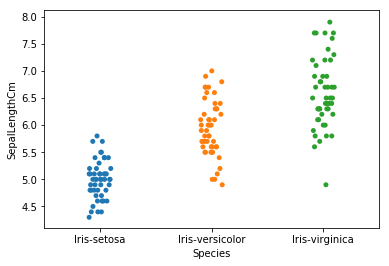

In [45]:
sns.stripplot(x="Species", y="SepalLengthCm", data=iris, jitter=True)

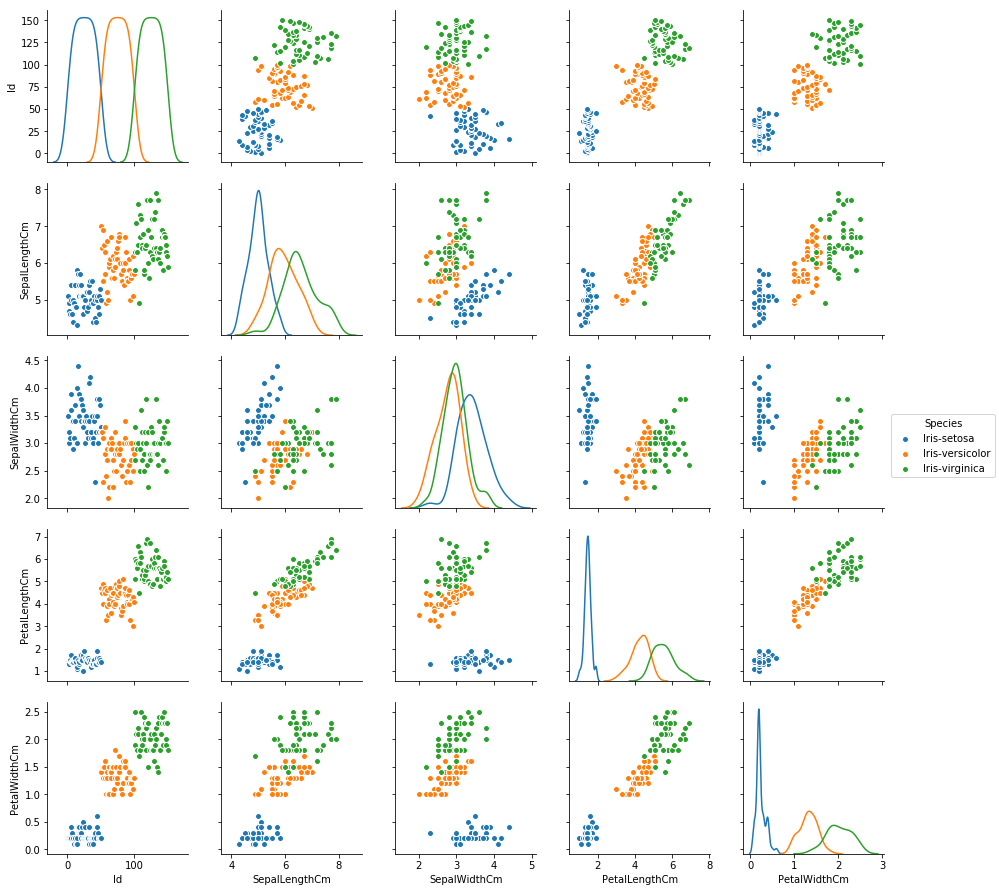

In [46]:
sns.pairplot(iris, hue='Species', diag_kind='kde')

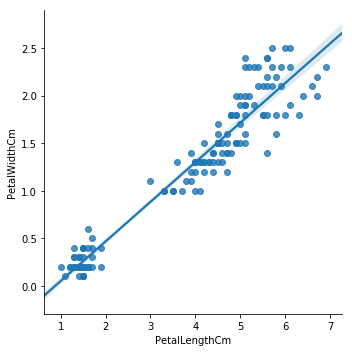

In [47]:
sns.lmplot(x="PetalLengthCm", y="PetalWidthCm", data=iris)

In [56]:
X = iris[["PetalLengthCm"]]
#X = np.vander(X, 1) # add a constant row for the intercept
y = iris["PetalWidthCm"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           PetalWidthCm   R-squared:                       0.967
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     4372.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):          2.55e-112
Time:                        10:39:19   Log-Likelihood:                -9.4520
No. Observations:                 150   AIC:                             20.90
Df Residuals:                     149   BIC:                             23.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
PetalLengthCm     0.3364      0.005     66.124

In [52]:
dummies = pd.get_dummies(iris["Species"])
# Add to the original dataframe
iris = pd.concat([iris, dummies], axis=1)
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1,0,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1,0,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1,0,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1,0,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1,0,0


In [53]:
X = iris[["PetalLengthCm", "Iris-setosa", "Iris-versicolor", "Iris-virginica"]]
y = iris["SepalLengthCm"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          SepalLengthCm   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     249.1
Date:                Wed, 06 Feb 2019   Prob (F-statistic):           3.34e-57
Time:                        10:38:38   Log-Likelihood:                -48.193
No. Observations:                 150   AIC:                             104.4
Df Residuals:                     146   BIC:                             116.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
PetalLengthCm       0.9043      0.065     

In [63]:
iris = sm.datasets.get_rdataset('iris','datasets')
y = iris.data.Species 
X = iris.data.iloc[:, 0:4]
columns = list(iris.data.columns)
iris.data[columns].head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [72]:
X['intercept'] = 1.0
y = pd.get_dummies(y, prefix='Species')
for species in y:
    target = y[species]
    logit = sm.MNLogit(target, X)
    model = logit.fit()
print(model.summary())

         Current function value: 0.000000
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.483566
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.039662
         Iterations 14
                          MNLogit Regression Results                          
Dep. Variable:      Species_virginica   No. Observations:                  150
Model:                        MNLogit   Df Residuals:                      145
Method:                           MLE   Df Model:                            4
Date:                Wed, 06 Feb 2019   Pseudo R-squ.:                  0.9377
Time:                        10:54:01   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -95.477
                                        LLR p-value:                 1.189e-37
Species_virginica=1       coef    std err          z      P>|z|      [0.025      0.975]
---------

C:\Users\emurp010\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
